# A/B Hypothesis Testing for Ad campaign performance

1) data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. For each of the plots you produce, write a description of what the plot shows in markdown cells.

2)Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided..

3)Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.

4)What does your A/B testing analysis tell you? Is brand awareness increased for the exposed group?


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path = '../data'

In [3]:
df = pd.read_csv(path+'/AdSmartABdata.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [33]:
# Converting date object to panda datatime
pd.set_option('display.max_rows', None)
df['date']=pd.to_datetime(df['date'])

In [35]:
len(df['device_make'].value_counts())

270

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


In [9]:
# checking for missing values
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [10]:
df.columns.tolist()

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

# Exploratory analysis

In [27]:
#Value of users who said yes, no and not replied
df.groupby('yes')['no'].value_counts()

yes  no
0    0     6834
     1      671
1    0      572
Name: no, dtype: int64

Users with answer 'yes' = 572

Users with answer 'no' = 672

Users with out reply = 6834

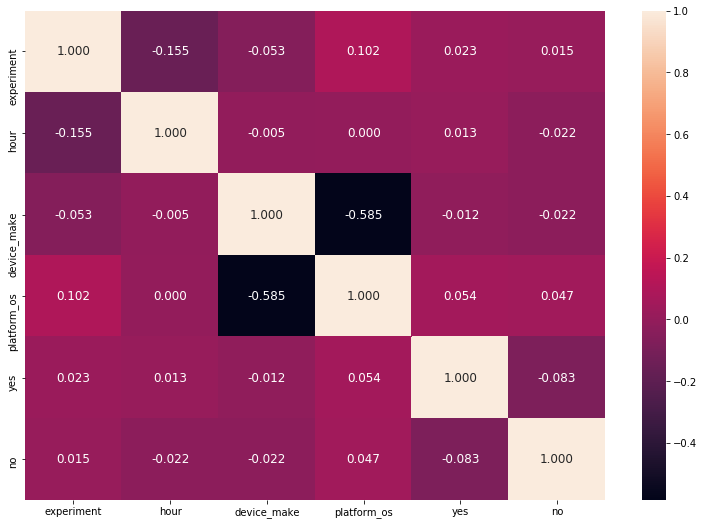

In [31]:
df_new=df[['experiment','date','hour','device_make','platform_os','browser','yes','no']].copy()
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_new['experiment'] = ord_enc.fit_transform(df_new[["experiment"]])
df_new['device_make'] = ord_enc.fit_transform(df_new[['device_make']])
corrMatrix = df_new.corr()
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corrMatrix,annot=True,fmt='.3f',annot_kws={"size":12})
plt.show()

The biggest correlation is between Plateform_OS and Device_Make which is -0.585.

- Experiment has negative 0.155 correlation between hours
- Experiment has positive 0.102 correlation between plateform_os
- Experiment negative 0.053 correlation between device_make
- Experiment positive 0.023 correlation between saying yes
- Experiment positive 0.015 correlation between saying no
         